## 1. Import the Libraries

In [1]:
# Import Numpy, Pandas, Matplotlib and Seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Data

In [2]:
# Load the dataset (read from .csv file, set it to a Pandas DataFrame and set the first column as the index)
college_df = pd.read_csv('College_Data', index_col=0)

## 3. Exploratory Data Analysis

- Study the dataset and describe the columns to understand the data
- Aim is to gain intuition about the data, good understanding of the dataset, some notes for Data Cleaning, and possibly some ideas for Feature Engineering

### 3.1 Check out the Data

#### Insights we could draw from the data:
1. To get to know the data
2. Answer a set of basic questions about the dataset:	
    - How many observations do we have?
	- How many features?
        - Which features are available in the dataset?
	- What are the data types of the features?
        - Which features are numerical?
        - Which features are categorical?
        - Which features are mixed data types?
	- Do we have a target variable (label)?
    - What is the distribution of numerical feature values across the samples?

In [3]:
# Display the few top rows of a DataFrame
college_df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [4]:
# Shape of the dataset
college_df.shape

(777, 18)

In [5]:
# List of the column names
college_df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [6]:
# List of all numerical columns
college_df.select_dtypes(include='number').columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [7]:
# List of all non-numerical columns
college_df.select_dtypes(exclude='number').columns

Index(['Private'], dtype='object')

In [8]:
# Data type of each column in a DataFrame
college_df.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [9]:
# Find out how many entries (rows and columns) there are, what type of objects are in the DataFrame (to observe if they have the correct type) etc.
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [10]:
# Summarize the data to see the distribution of data (Statistical information of numerical columns)
college_df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

#### Conclusion:
- The dataset contains 777 rows and 18 columns
    - **Number of observations**: 777
    - **Number of attributes**: 18 predictor variables and no target variable*
        - **Predictor variables (features)** are: 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'
        - **Target variable (label)** is: NA*
- Types of the data contained within columns are float64 (10 columns) and int64 (1 column)
    - **Numerical variables (features)** are: 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'
    - **Non-numerical variables (features)** is: 'Private'*
- Data variables types:
    - **Numerical** (Continous or Discrete): 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'
    - **Categorical** (Nominal or Ordinal): 'Private'
- No missing values in the dataset
- So far, there are no feature(s) that is/are of no significance and cannot provide any insight into the dataset


***Note**: Actually there are labels for the dataset, but they will NOT be used for the K-Means Clustering algorithm, since it is an Unsupervised learning algorithm

### 3.2 Data Visualizations

- Overall goal is **to visualize the data** and to get understanding of **which features are important** for analysis 
- **Types of plots for visualization**:
    - **Univariate plots**
        - plots of each **individual feature**
        - to better **understand each feature**
        - use Count plot, Bar plot, Histogram, Dist plot, Box plot, Whisker plot etc.
    - **Multivariate plots**
        - plots of several **(multi) features**
        - to better **understand the relationships between features**
        - Scatter plot, Heatmap, Pair plot, Bar plot etc.
- In order to select the appropriate plots for visualization, first **understand the Data Variables type (Numerical or Categorical)**:
    - Plot Categorical Distributions
    - Plot Numerical Distributions
    - Plot Correlations
    - Plot Segmentations

#### Insights we could draw from the charts:
**1. Plot Categorical Distributions**
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

**2. Plot Numerical Distributions**
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

**3. Plot Correlations**
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?
   
**4. Plot Segmentations**
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

In [11]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

#### 3.2.1 Plot Numerical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

<Figure size 864x576 with 0 Axes>

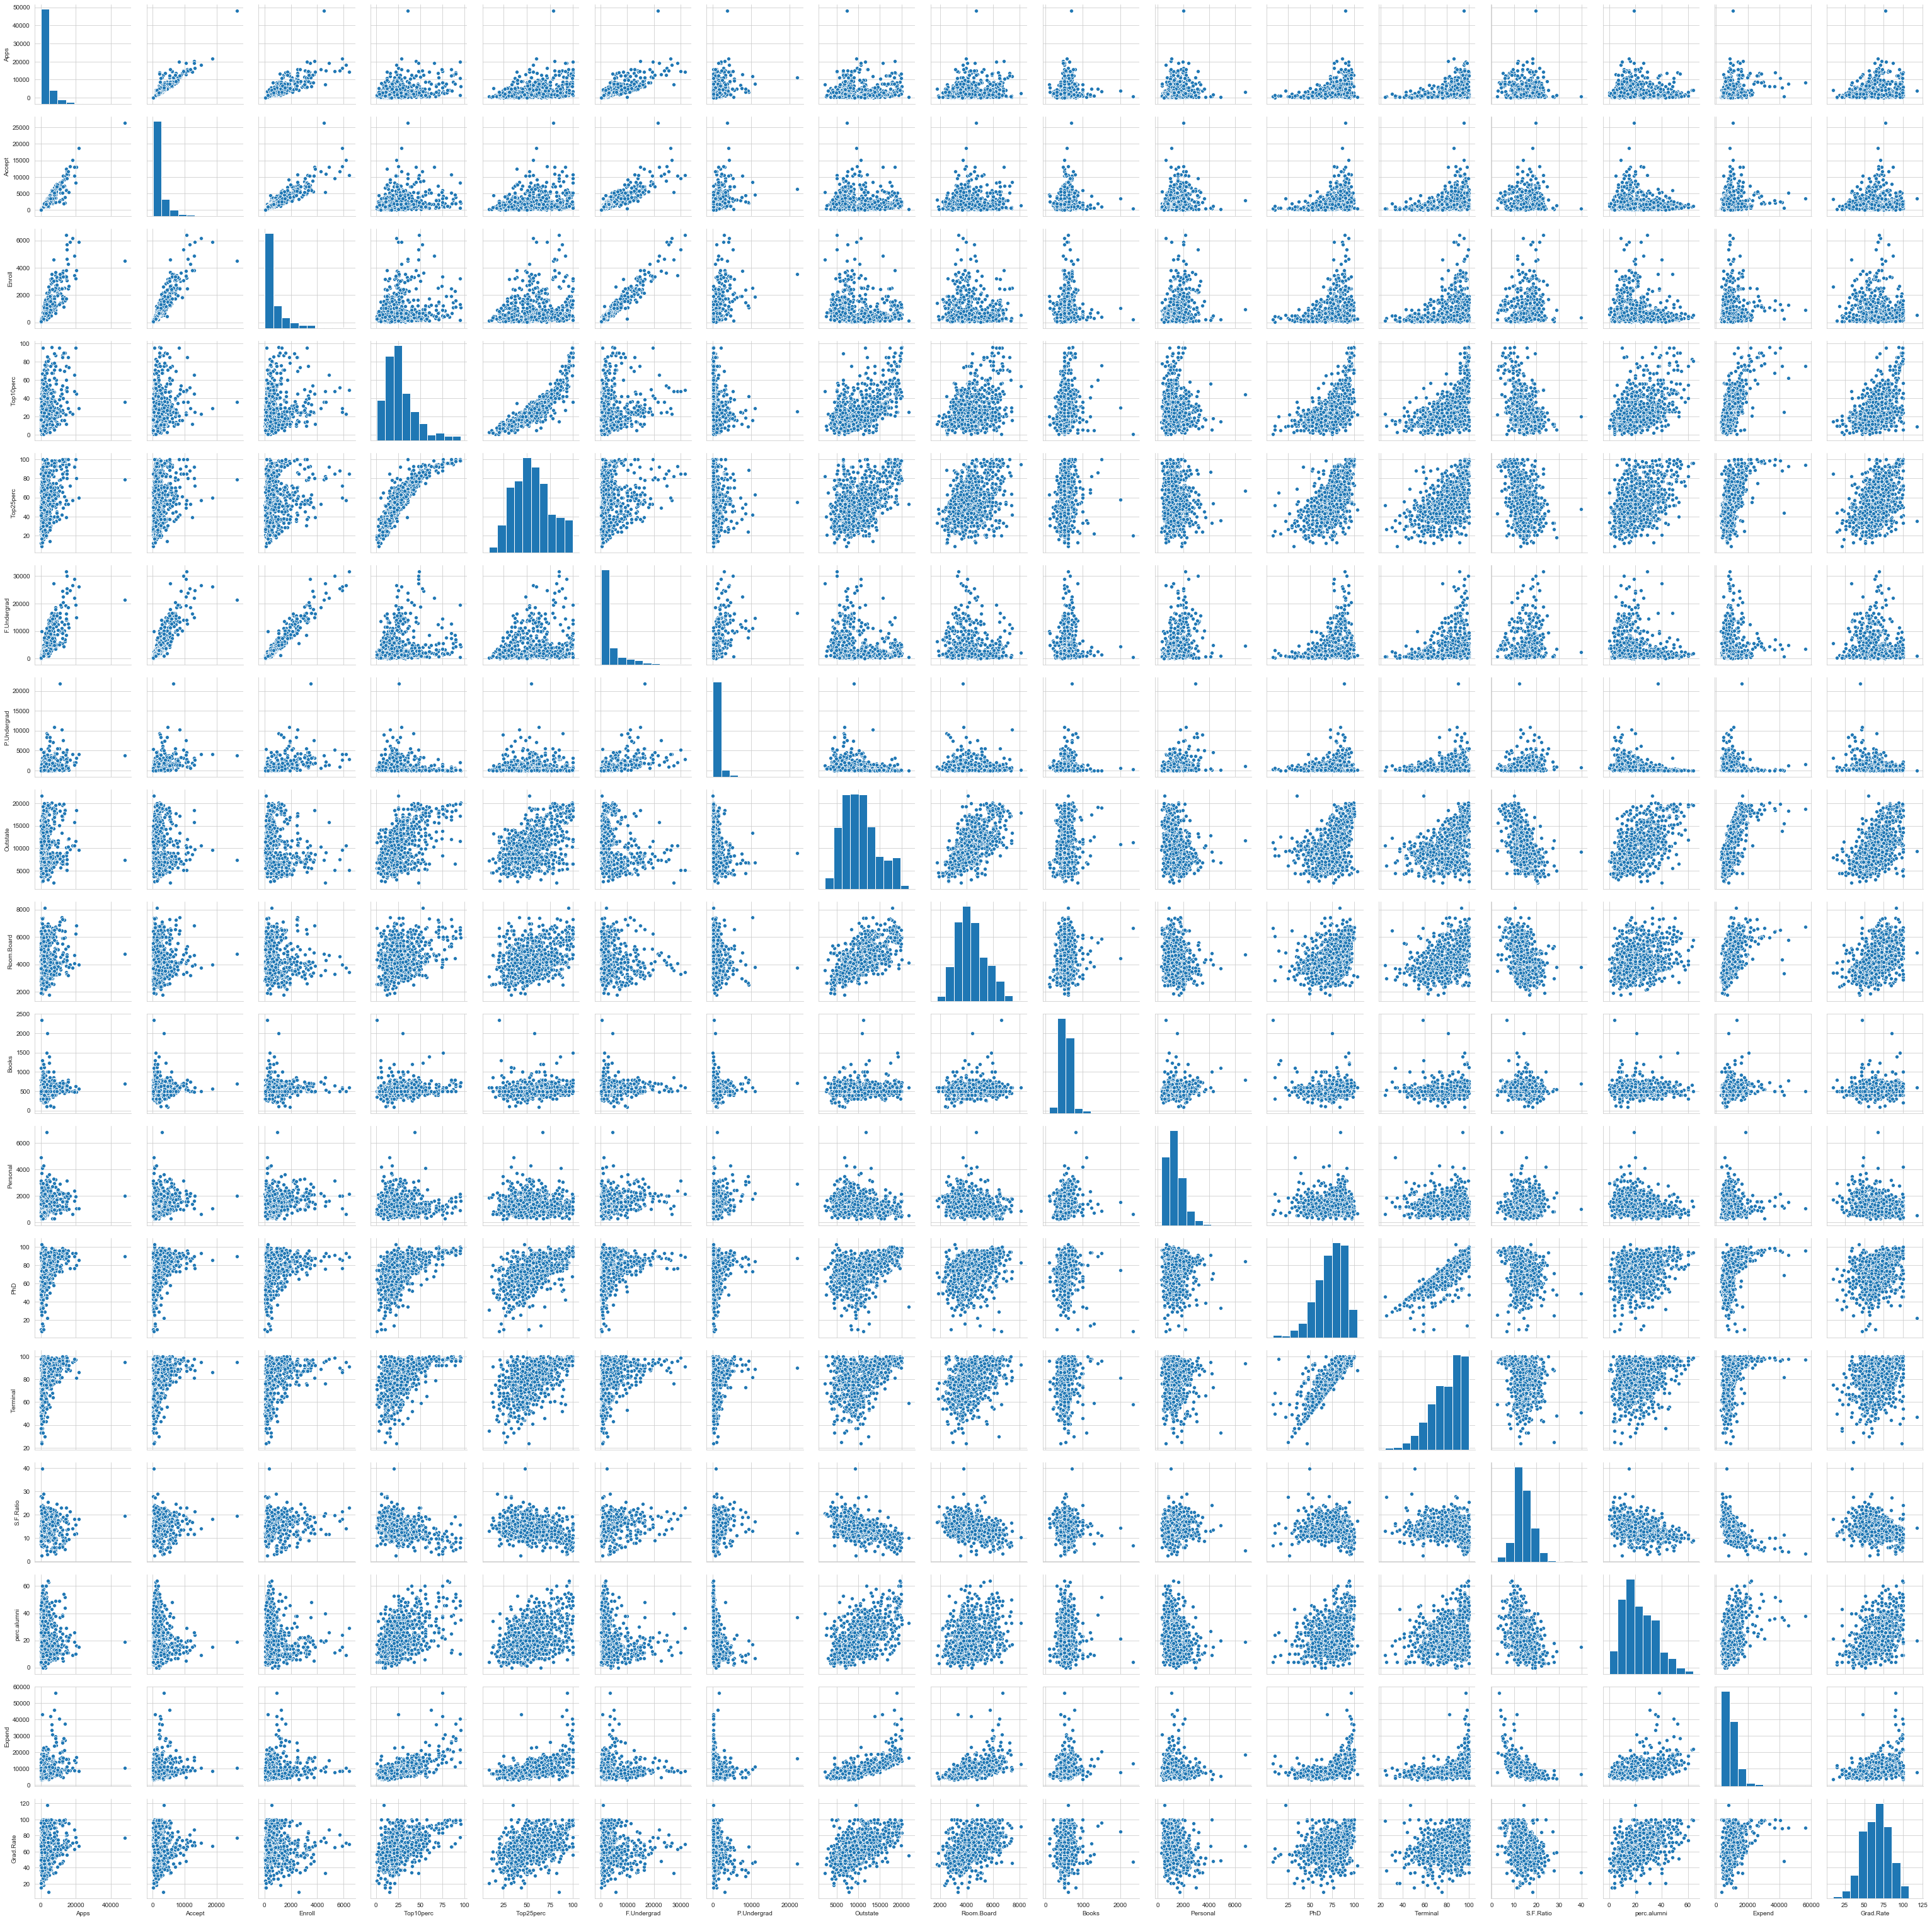

In [12]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of and the correlation between all numerical features
sns.pairplot(data=college_df, palette='Dark2')
plt.show()

#### Conclusion:
- Most of the features have right-skewed distribution, some features are normaly distributed and few features have left-skewed distribution
- Some features seem to be highly correlated

### 1. `Outstate` feature

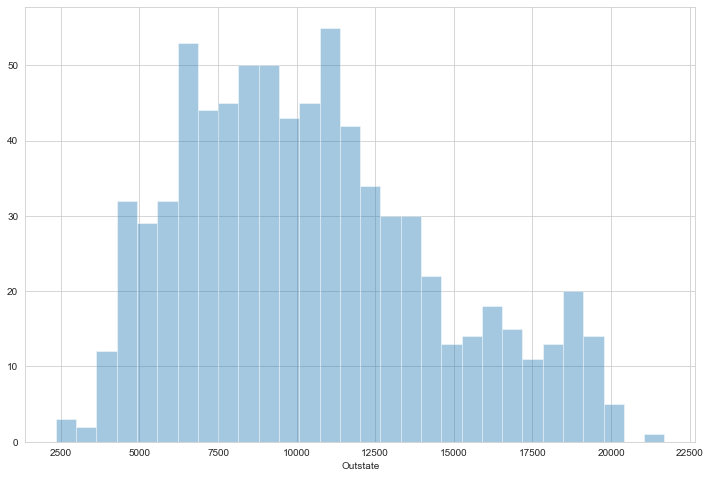

In [13]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(college_df['Outstate'].dropna(), kde=False, bins=30)
plt.show()

In [14]:
# Compute the arithmetic mean (average) value
college_df['Outstate'].mean()

10440.66924066924

#### Conclusion:
- Most observations are in Out-of-state tuition range of 5.000 to 16.000 US dollars

### 2. `Grad.Rate` feature

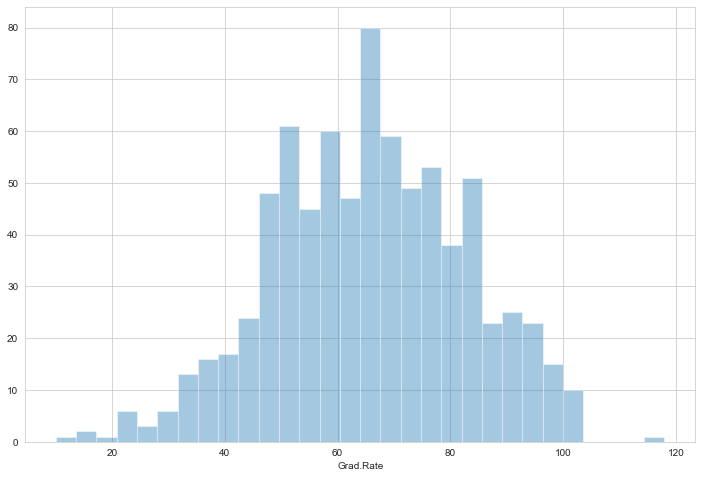

In [15]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)
plt.show()

In [16]:
# Compute the arithmetic mean (average) value
college_df['Grad.Rate'].mean()

65.46332046332046

#### Conclusion:
- Most observations are in Graduation rate range of 40% to 80%
- There is an observation with Graduation rate higher than 100%, which does not make sense and therefore it needs to be corrected -> set that school's Graduation rate to 100%

#### 3.2.2 Plot Correlations

- Few things to look out for and insights we could draw from the charts:
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?

In [17]:
# Display data correlation (correlations between all numerical feature variables)
college_df.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

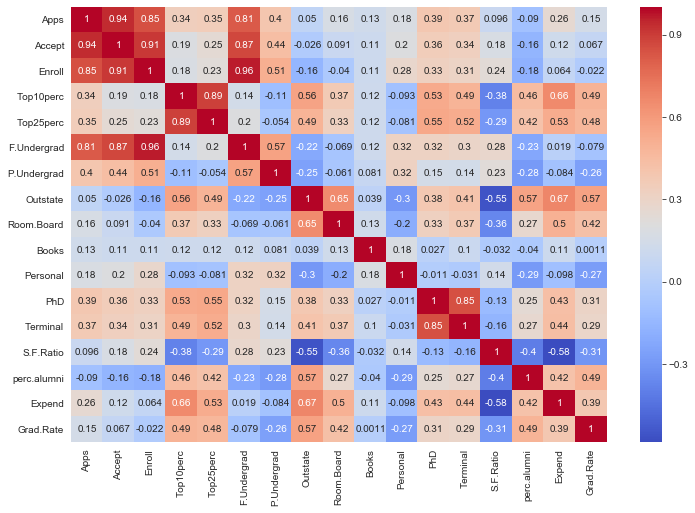

In [18]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore correlations between all continuous (numeric) feature variables through visualization
ax = sns.heatmap(data=college_df.corr(), annot=True, cmap='coolwarm')
plt.ylim(17,0)

plt.show()

#### Conclusion:
- Resulting correlation table and Heatmap show the correlation score between all numerical feature variables
    - Very high positive correlation values of >80% between 'Apps', 'Accept', 'Enroll', and 'F.Undergrad' -> highly correlated features
    - Moderately positive correlation value of 0.67 between 'Expend' and 'Outstate' and 0.66 between 'Expend' and 'Top10perc'
    - Moderately negative correlation value of -0.58 between 'S.F.Ratio' and 'Expend' and -0.55 between 'S.F.Ratio' and 'Outstate'
- Relatively high correlations between predictor variables

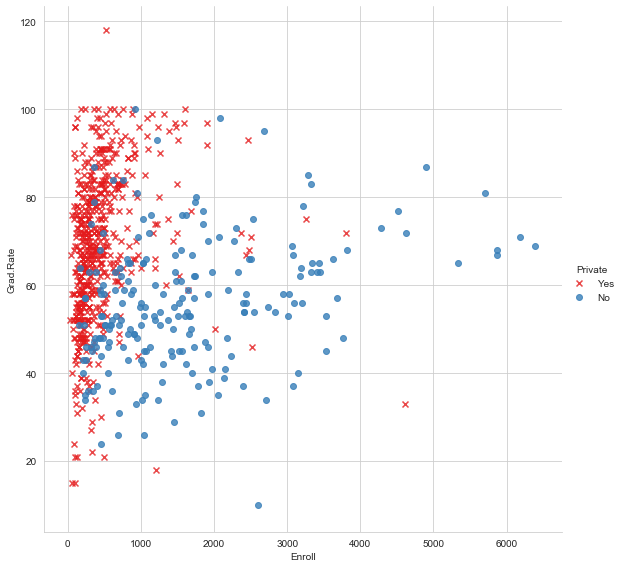

In [19]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Enroll', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

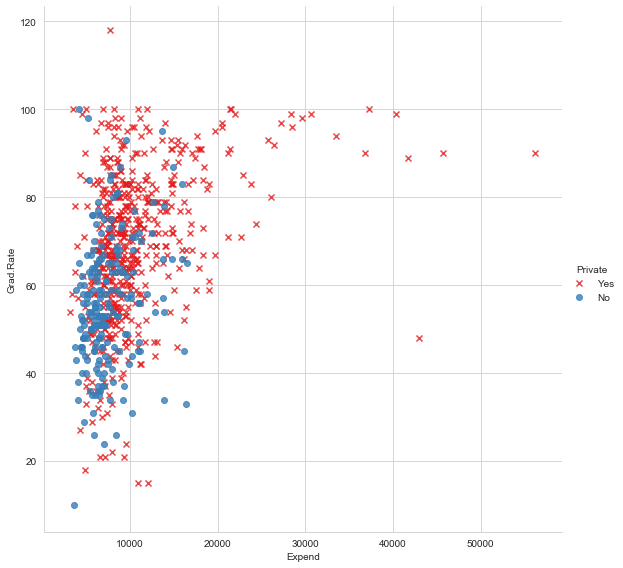

In [20]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Expend', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

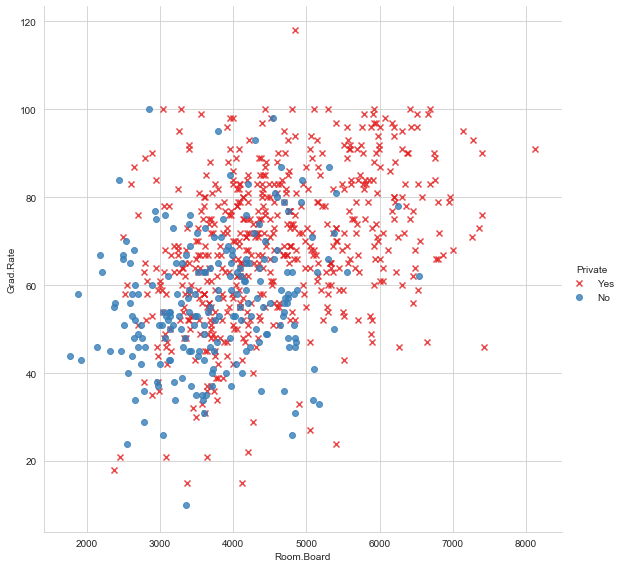

In [21]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Room.Board', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

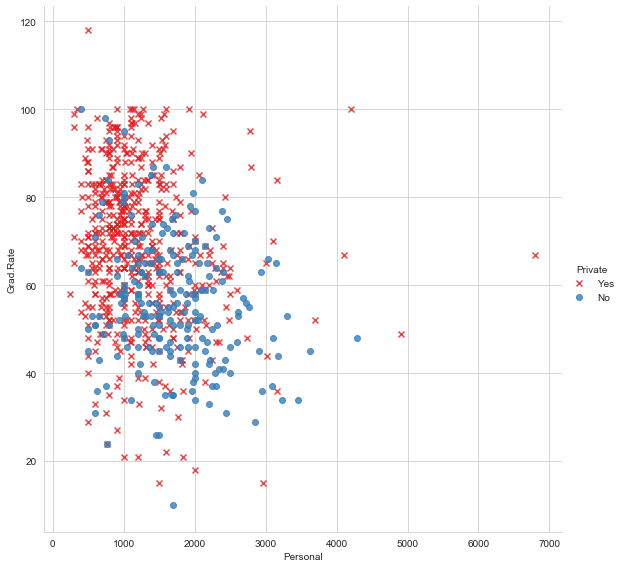

In [22]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Personal', y='Grad.Rate', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

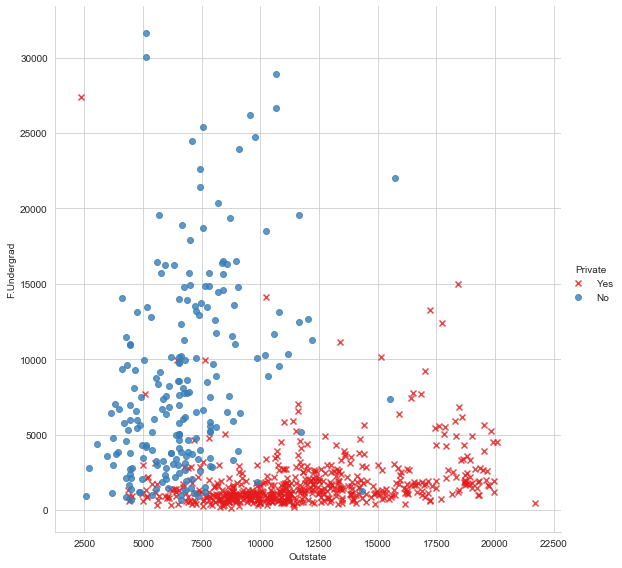

In [23]:
# Display (plot) and explore the relationship between a pair of numerical features as a function of a third feature
sns.lmplot(x='Outstate', y='F.Undergrad', data=college_df, hue='Private', palette='Set1', markers=["x", "o"], height=8, aspect=1, fit_reg=False)

Text(0.5, 0, 'Outstate')

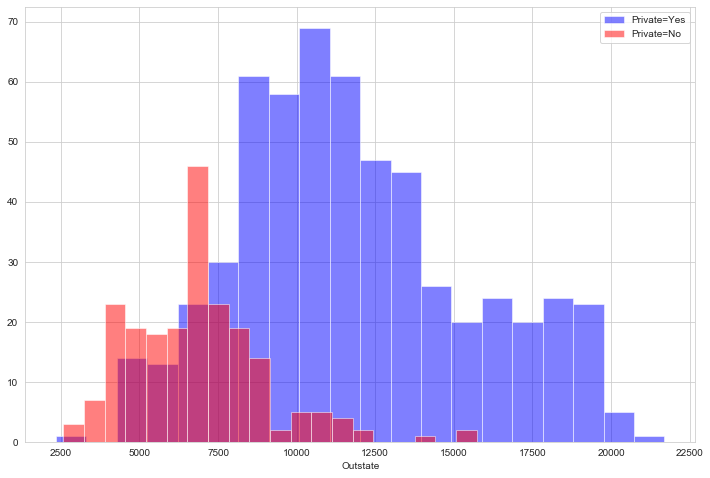

In [24]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the Stacked histogram of a continious (numeric) feature based on categorical feature
college_df[college_df['Private']=='Yes']['Outstate'].hist(alpha=0.5, color='blue', bins=20, label='Private=Yes')
college_df[college_df['Private']=='No']['Outstate'].hist(alpha=0.5, color='red', bins=20, label='Private=No')

# Show a legend on the axes
plt.legend()

# Set the label for the x-axis
plt.xlabel('Outstate')

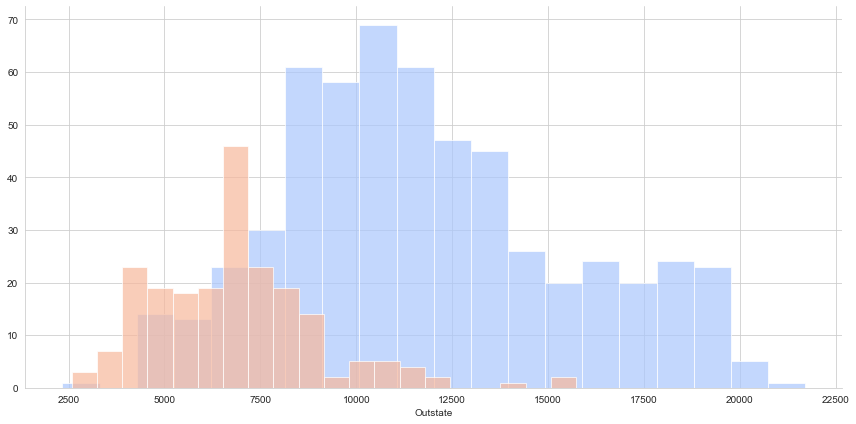

In [25]:
# Initialize a Grid of Facets and display (plot) different subsets of data on top of each other (stacked)
g = sns.FacetGrid(college_df, hue="Private", palette='coolwarm', height=6, aspect=2)

# Draw a univariate plot on the Facet (histogram) and explore the distribution 
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

Text(0.5, 0, 'Grad.Rate')

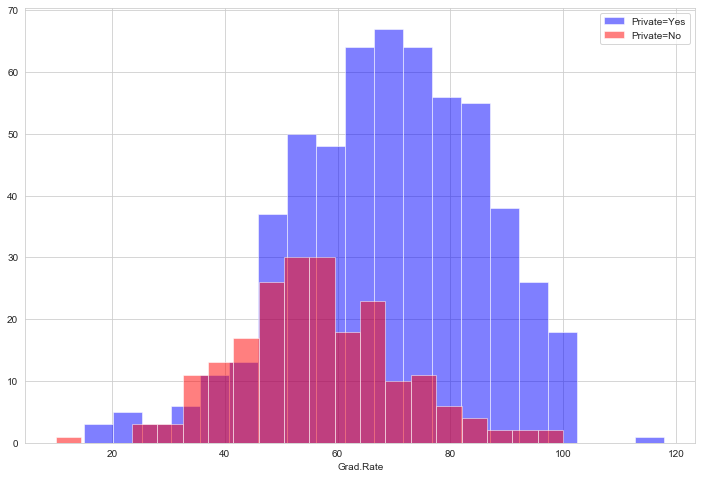

In [26]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the Stacked histogram of a continious (numeric) feature based on categorical feature
college_df[college_df['Private']=='Yes']['Grad.Rate'].hist(alpha=0.5, color='blue', bins=20, label='Private=Yes')
college_df[college_df['Private']=='No']['Grad.Rate'].hist(alpha=0.5, color='red', bins=20, label='Private=No')

# Show a legend on the axes
plt.legend()

# Set the label for the x-axis
plt.xlabel('Grad.Rate')

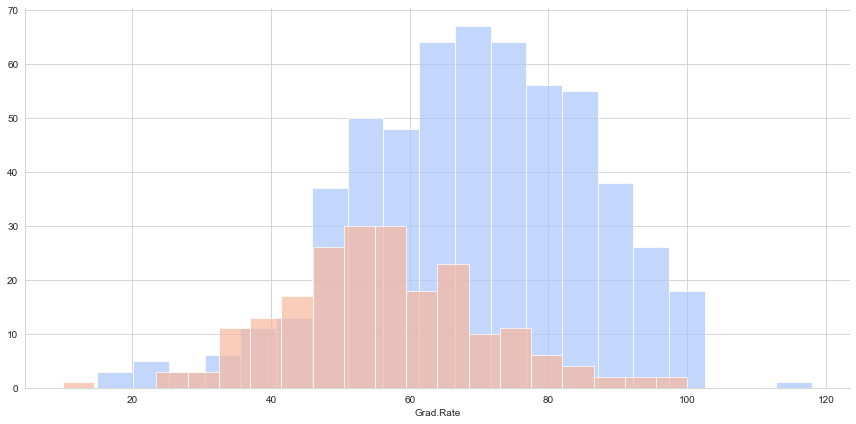

In [27]:
# Initialize a Grid of Facets and display (plot) different subsets of data on top of each other (stacked)
g = sns.FacetGrid(college_df, hue="Private", palette='coolwarm', height=6, aspect=2)

# Draw a univariate plot on the Facet (histogram) and explore the distribution
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

## 4. Data Preprocessing and Feature Engineering

#### Data Preprocessing and Feature Engineering by:
- check the relationship of the columns (features) with the target variable (label)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- check the missing values by columns (features) and rows (observations)
    - drop the columns (features) and rows (observations) with missing values
    - fill in the missing values in columns (features)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- convert to a Dummy variable feature using One-hot coding
- extracting the Date
- remove erroneous values
- redundant data
- nullify the impact of outliers
- etc.

### 4.1 Dealing with Missing values

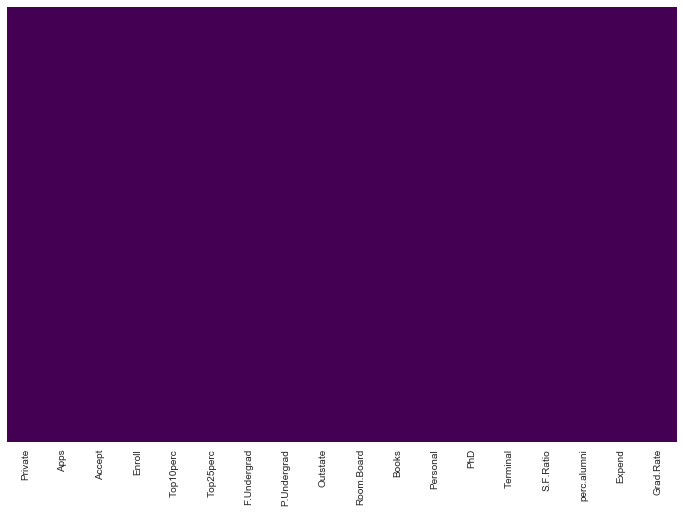

In [28]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) the missing values
sns.heatmap(data=college_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
# Total count of missing (null) values for each column and sort them in ascending order
college_df.isnull().sum().sort_values(ascending=False)

Grad.Rate      0
Expend         0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Private        0
dtype: int64

In [30]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
college_df.isnull().mean().sort_values(ascending=False)*100

Grad.Rate      0.0
Expend         0.0
Apps           0.0
Accept         0.0
Enroll         0.0
Top10perc      0.0
Top25perc      0.0
F.Undergrad    0.0
P.Undergrad    0.0
Outstate       0.0
Room.Board     0.0
Books          0.0
Personal       0.0
PhD            0.0
Terminal       0.0
S.F.Ratio      0.0
perc.alumni    0.0
Private        0.0
dtype: float64

#### Conclusion:
- No missing values in the dataset

### 4.2 Dealing with the Non-numerical features

In [31]:
# List all non-numerical columns
college_df.select_dtypes(exclude='number').columns

Index(['Private'], dtype='object')

In [32]:
# Create a new column indicating the categorical data (0 or 1)
cluster = pd.get_dummies(college_df['Private'], drop_first=True)

In [33]:
# Concatination of dummy columns to actual DataFrame
college_df = pd.concat([college_df, cluster], axis=1)

In [34]:
# Drop column (feature) from the table
college_df.drop('Private', axis=1, inplace=True)

In [35]:
# Rename column name
college_df.rename(columns={'Yes': 'Cluster'}, inplace=True)

In [36]:
# Display the few top rows of a DataFrame
college_df.head()

Apps  Accept  Enroll  Top10perc  Top25perc  \
Abilene Christian University  1660    1232     721         23         52   
Adelphi University            2186    1924     512         16         29   
Adrian College                1428    1097     336         22         50   
Agnes Scott College            417     349     137         60         89   
Alaska Pacific University      193     146      55         16         44   

                              F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Abilene Christian University         2885          537      7440        3300   
Adelphi University                   2683         1227     12280        6450   
Adrian College                       1036           99     11250        3750   
Agnes Scott College                   510           63     12960        5450   
Alaska Pacific University             249          869      7560        4120   

                              Books  Personal  PhD  Terminal  S.F.Ratio  \
Abilene Christian University    450      2200   70        78       18.1   
Adelphi University              750      1500   29        30       12.2   
Adrian College                  400      1165   53        66       12.9   
Agnes Scott College             450       875   92        97        7.7   
Alaska Pacific University       800      1500   76        72       11.9   

                              perc.alumni  Expend  Grad.Rate  Cluster  
Abilene Christian University           12    7041         60        1  
Adelphi University                     16   10527         56        1  
Adrian College                         30    8735         54        1  
Agnes Scott College                    37   19016         59        1  
Alaska Pacific University               2   10922         15        1

#### Conclusion:
- Non-numerical variables (features) in the dataset is 'Private'
- 'Private' is categorical (ordinal) and therefore encoded using One-hot encoding

### 4.3 Dealing with Outliers

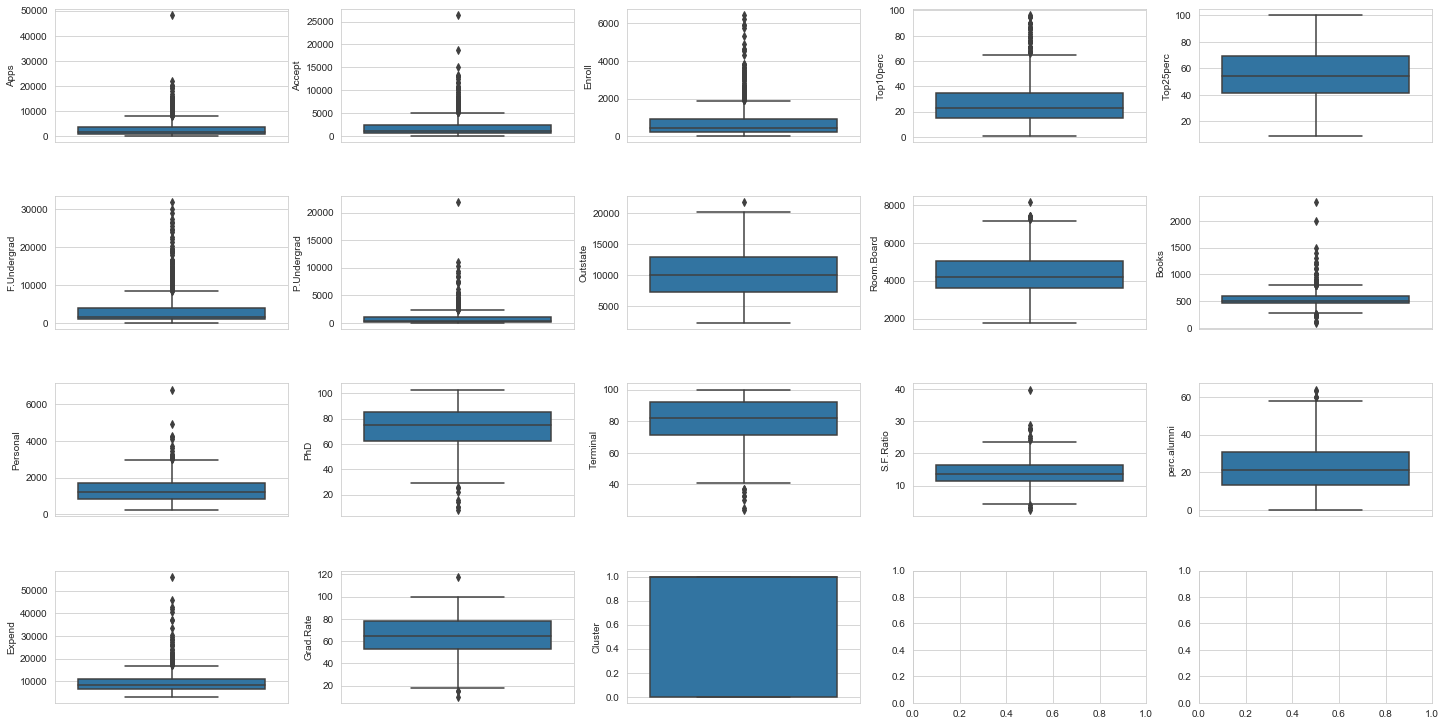

In [37]:
# Display (plot) and explore the dataset to see trends / statistics
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in college_df.items():
    sns.boxplot(y=k, data=college_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Conclusion:
- Most of the columns seems to have outliers

In [38]:
# Percentage of Outliers in columns using InterQuartile Range (IQR) score
for k, v in college_df.items():
        Q1 = v.quantile(0.25)   # Lower quartile
        Q3 = v.quantile(0.75)   # Upper quartile
        IQR = Q3 - Q1           # IQR score
        
        cut_off = 1.5 * IQR     # Calculate the Outlier cutoff
        lower = Q1 - cut_off
        upper = Q3 + cut_off
        
        v_col = v[(v <= lower) | (v >= upper)]                       # Detecting Outliers with IQR score
        perc = np.shape(v_col)[0] * 100.0 / np.shape(college_df)[0]   # Percentage of Outliers in columns
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Apps outliers = 9.01%
Column Accept outliers = 9.40%
Column Enroll outliers = 10.17%
Column Top10perc outliers = 5.15%
Column Top25perc outliers = 0.00%
Column F.Undergrad outliers = 12.48%
Column P.Undergrad outliers = 8.62%
Column Outstate outliers = 0.13%
Column Room.Board outliers = 0.90%
Column Books outliers = 6.18%
Column Personal outliers = 2.57%
Column PhD outliers = 1.03%
Column Terminal outliers = 1.03%
Column S.F.Ratio outliers = 1.54%
Column perc.alumni outliers = 0.77%
Column Expend outliers = 6.18%
Column Grad.Rate outliers = 0.51%
Column Cluster outliers = 0.00%


### 4.4 Cleaning the data

In [39]:
# Check the observation that does not make sense for specific feature
college_df[college_df['Grad.Rate'] > 100]

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Cazenovia College  3847    3433     527          9         35         1010   

                   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
Cazenovia College           12      9384        4840    600       500   22   

                   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
Cazenovia College        47       14.3           20    7697        118   

                   Cluster  
Cazenovia College        1

In [40]:
# Set the observation to a reasonable value
college_df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


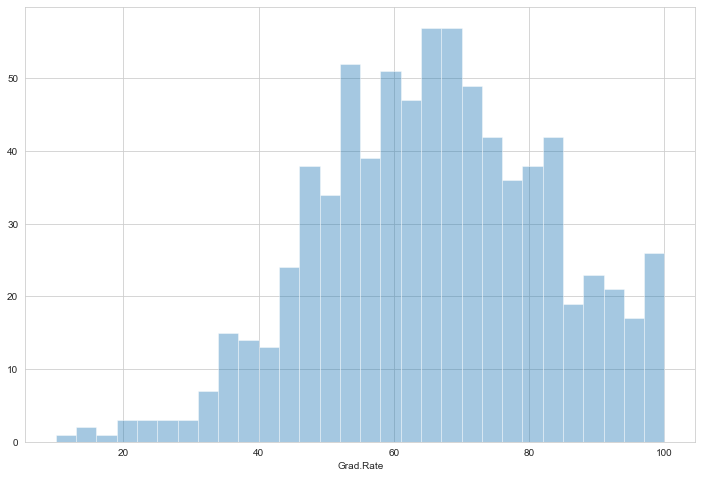

In [41]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(college_df['Grad.Rate'].dropna(), kde=False, bins=30)
plt.show()

#### Conclusion:
- There is no observation with Graduation rate higher than 100%

### 4.5 Standardize (Scale) the values of variables

- **Standardize / Scale / Normalize the values of variables** to same scale based on parameters
- **Steps are**:
    - Import the preprocessing tool
    - Create an object of the preprocessing tool (scaler)
    - Fit the scaler to the features in order to calculate the parameters
    - Transform (Scale) the features to a scaled version using the calculated parameters
    - Convert the scaled features to a DataFrame
- **Preprocessing tools** from Scikit-Learn:
    - **StandardScaler()** - Standardize features by removing the mean and scaling to unit variance
    - **MinMaxScaler()** - Transform features by scaling each feature to a given range (default=(0, 1))
    - **MaxAbsScaler()** - Scale each feature by its maximum absolute value

### StandardScaler()
- Standardize features by **removing the mean μ and scaling to unit variance (or equivalently, unit standard deviation σ)**
- **Used to center the data** (make it have zero mean μ and unit standard deviation σ)
- **Result** is Standard scale or **Scaled (Standardized) version of data**
- The **standard score z of a sample x** is calculated as:
               
                      z = (x - μ) / σ

    where:
    - **μ** is the **Mean of the training samples** or zero if with_mean=False
    - **σ** is the **Standard deviation of the training samples** or one if with_std=False


- **Centering and scaling happen independently on each feature** by **computing the relevant statistics on the samples in the training set**:
    - **.fit() calculates the parameters** (μ and σ in case of StandardScaler())
    - **Mean μ and Standard deviation σ are then stored** as an internal object's state
    - parameters are **used on later data using .transform()**
- **Parameters used**:
    - **copy** - boolean (if False, try to avoid a copy and do inplace scaling instead)
    - **with_mean** - boolean (if True, center the data before scaling)
    - **with_std** - boolean (if True, scale the data to unit variance (or equivalently, unit standard deviation))

- Scale of the variables **matters due to the Distance metric**
- more information: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [42]:
# Import preprocessing tool (Standard Scaler) from Scikit-Learn
from sklearn.preprocessing import StandardScaler

In [43]:
# Learn about the function and parameters used within class StandardScaler
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing.data:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  StandardScaler(copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like 

In [44]:
# Convert a datatype of a column to 'int'
college_df['Cluster'] = college_df['Cluster'].astype(int)

In [45]:
# Split of DataFrame to columns
college_df_new = college_df.drop('Cluster', axis=1)
cluster_df = college_df[college_df.columns[-1:]]

In [46]:
# Display the few top rows of a DataFrame
college_df_new.head()

Apps  Accept  Enroll  Top10perc  Top25perc  \
Abilene Christian University  1660    1232     721         23         52   
Adelphi University            2186    1924     512         16         29   
Adrian College                1428    1097     336         22         50   
Agnes Scott College            417     349     137         60         89   
Alaska Pacific University      193     146      55         16         44   

                              F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Abilene Christian University         2885          537      7440        3300   
Adelphi University                   2683         1227     12280        6450   
Adrian College                       1036           99     11250        3750   
Agnes Scott College                   510           63     12960        5450   
Alaska Pacific University             249          869      7560        4120   

                              Books  Personal  PhD  Terminal  S.F.Ratio  \
Abilene Christian University    450      2200   70        78       18.1   
Adelphi University              750      1500   29        30       12.2   
Adrian College                  400      1165   53        66       12.9   
Agnes Scott College             450       875   92        97        7.7   
Alaska Pacific University       800      1500   76        72       11.9   

                              perc.alumni  Expend  Grad.Rate  
Abilene Christian University           12    7041         60  
Adelphi University                     16   10527         56  
Adrian College                         30    8735         54  
Agnes Scott College                    37   19016         59  
Alaska Pacific University               2   10922         15

In [47]:
# Display the few top rows of a DataFrame
cluster_df.head()

Cluster
Abilene Christian University        1
Adelphi University                  1
Adrian College                      1
Agnes Scott College                 1
Alaska Pacific University           1

In [48]:
# Instantiate the StandardScaler() model with parameters
# Create an instance of class StandardScaler() model (Standard Scaler object)
scaler = StandardScaler()

In [49]:
# Fit the scaler to the features
scaler.fit(college_df_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
# Transform the features to a scaled version and create scaled features variable
scaled_features = scaler.transform(college_df_new)

# Check the scaled values
scaled_features

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

In [51]:
# Convert the scaled features to a DataFrame
college_df_feat = pd.DataFrame(scaled_features, columns=college_df.columns[:-1])

In [52]:
# Display the few top rows of a DataFrame
college_df_feat.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.317993  
1  -0.477704    -0.544572  0.166110  -0.551805  
2  -0.300749     0.585935 -0.177290  -0.668710  
3  -1.615274     1.151188  1.792851  -0.376446  
4  -0.553542    -1.675079  0.241803  -2.948375

In [53]:
# Concatination of two DataFrames with reseting index of the DataFrames to concatenate
college_df_feat = pd.concat([college_df_feat.reset_index(drop=True), cluster_df.reset_index(drop=True)], axis=1)

In [54]:
# Display the few top rows of a DataFrame
college_df_feat.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  Cluster  
0   1.013776    -0.867574 -0.501910  -0.317993        1  
1  -0.477704    -0.544572  0.166110  -0.551805        1  
2  -0.300749     0.585935 -0.177290  -0.668710        1  
3  -1.615274     1.151188  1.792851  -0.376446        1  
4  -0.553542    -1.675079  0.241803  -2.948375        1

## 5. Create the K-Means Clustering model

### 5.1 Create the K-Means Clustering model

In [55]:
# Import the 'KMeans' model from family 'cluster' of Scikit-Learn
from sklearn.cluster import KMeans

### 5.2 Choose the best K value

- use the Elbow Method
- compute the Within-Cluster-Sum-of-Squares (WCSS)
- choose the K value at which the Within-Cluster-Sum-of-Squares (WCSS) decreases abruptly

In [56]:
# Define empty list of Within-Cluster-Sum-of-Squares (WCSS)
wcss = []

# Loop through for number of clusters
for i in range(1,11):

    # Create an instance of class KMeans() model (KMeans object)
    kmeans = KMeans(n_clusters = i)
    
    # Fit the K-Means Clustering model on data in dataset
    kmeans.fit(college_df_feat)
    
    # Calculate the Sum of squared distances of samples to their closest cluster center and append to the WCSS list
    wcss.append(kmeans.inertia_)

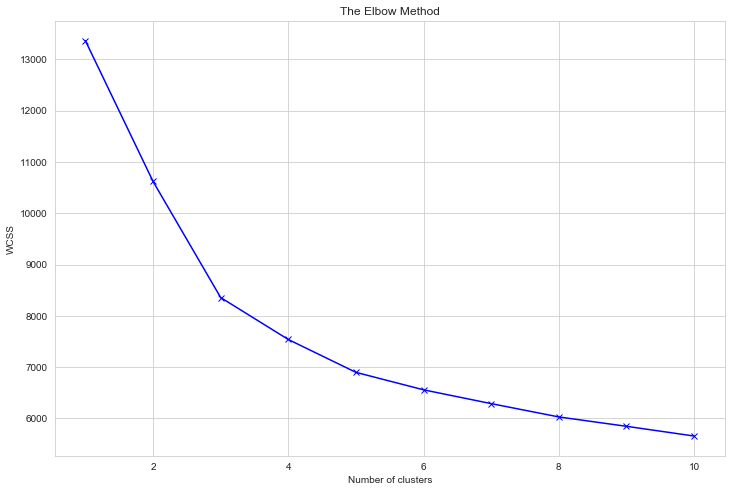

In [57]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Plot the calculated Within-Cluster-Sum-of-Squares (WCSS) based on the number of clusters using the Elbow Method
plt.plot(range(1,11), wcss, "bx-")

# Title of the plot
plt.title('The Elbow Method')

# Label the axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Show the plot
plt.show()

##### Conclusion:
- Within-Cluster-Sum-of-Squares (WCSS) decreases abruptly after number of clusters:
    - n_clusters=1
    - n_clusters=2
- choose K=2 for number of clusters

In [58]:
# Instantiate the KMeans() model (Estimator) with parameters
# Create an instance of class KMeans() model (KMeans object)
# n_clusters - the number of clusters we expect or want to explore (K=2)
kmeans = KMeans(n_clusters=2)

### 5.3 Fit the K-Means Clustering model

In [59]:
# Fit the K-Means Clustering model on data in dataset
kmeans.fit(college_df_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
# Centers of the clusters
km_centers = kmeans.cluster_centers_
km_centers

array([[ 0.54154604,  0.50609822,  0.4162237 ,  0.83453297,  0.83979032,
         0.36567472,  0.06221034,  0.76220744,  0.61892254,  0.20105471,
        -0.08162123,  0.8172959 ,  0.79741203, -0.39303606,  0.51790522,
         0.70536601,  0.60244044,  0.7739726 ],
       [-0.32604422, -0.30470243, -0.25059242, -0.50244047, -0.50560572,
        -0.2201588 , -0.03745448, -0.45889603, -0.37262966, -0.12104737,
         0.04914103, -0.49206269, -0.48009137,  0.23663202, -0.31181098,
        -0.42467397, -0.36270641,  0.69896907]])

In [61]:
# Labels of the clusters
km_labels = kmeans.labels_
km_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

### 5.4 Plotting of clustered data

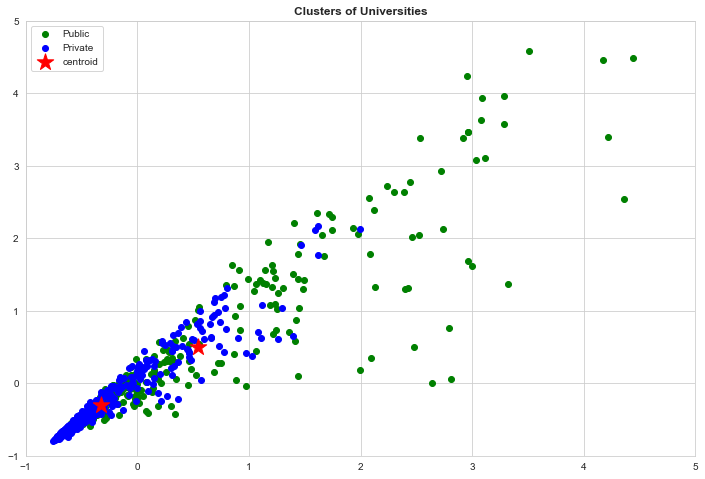

In [62]:
# Set up of the graphic areas size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the clustered data
plt.scatter(scaled_features[km_labels==0,0], scaled_features[km_labels==0,1], c='green', label='Public')
plt.scatter(scaled_features[km_labels==1,0], scaled_features[km_labels==1,1], c='blue', label='Private')

# Plot the centroids
plt.scatter(km_centers[:,0], km_centers[:,1], marker='*', s=300, c='r', label='centroid')

# Configure the ranges of the axes
plt.xlim([-1,5])
plt.ylim([-1,5])

# Title of the plot
plt.title('Clusters of Universities', fontweight='bold')

# Show the legend
plt.legend()

# Show the plot
plt.show()

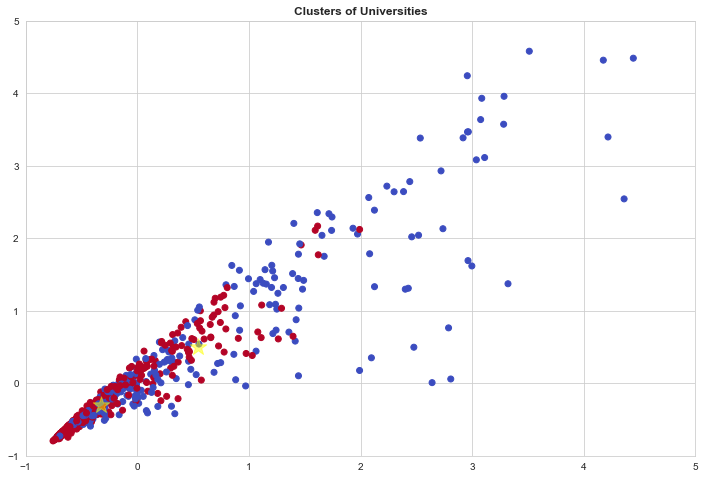

In [63]:
# Set up of the graphic areas size
fig, ax = plt.subplots(figsize=(12,8))

# Plot the clustered data
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=km_labels, cmap='coolwarm')
plt.scatter(km_centers[:,0], km_centers[:,1], marker='*', s=300, c='yellow', alpha=0.5)

# Configure the ranges of the axes
plt.xlim([-1,5])
plt.ylim([-1,5])

# Title of the plot
plt.title('Clusters of Universities', fontweight='bold')

# Show the plot
plt.show()

### 5.5 Evaluate the model

- There is no perfect way to evaluate Clustering if you don't have the labels
- Since this is just an exercise and we do have the labels*, we can evaluate the clusters

*Note: Usually won't have this luxury in the real world

#### 5.5.1 Classification report 

- Summarize (evaluate) the performance of the classifier on Testing data
- Basic terminology used in Classification report:								
    - **precision** -> how many times the positive prediction was actually positive (TP / (TP+FP))
	- **recall** -> out of all positive points how many were predicted positive (TP / (TP+FN))
	- **f1-score** -> Harmonic mean of precision and recall ((precision * recall) / (precision + recall))
	- **support** -> quantity per class

In [64]:
# Import the Classification report from Scikit-Learn metrics
from sklearn.metrics import classification_report

In [65]:
# Evaluate the performance of the model by using Classification report
print(classification_report(college_df_feat['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



##### Conclusion:
- Accuracy of 52% is not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups

#### 5.5.2 Confusion matrix

- Summary of prediction results on a Classification problem
- Use performance metrics to describe (evaluate) the performance of the Classification models on Testing data for which the true values are already known
- Basic terminology used in Confusion Matrix:								
    - **True Positive (TP)** -> reality is yes and predict is yes
	- **False Positive (FP)** -> reality is no and predict is yes (Type 1 error)
	- **False Negative (FN)** -> reality is yes and predict is no (Type 2 error)
	- **True Negative (TN)** -> reality is no and predict is no

            TP | FN
            ___ ___

            FP | TN

In [66]:
# Import the Confusion matrix from Scikit-Learn metrics
from sklearn.metrics import confusion_matrix

In [67]:
# Evaluate the performance of the model by using Confusion matrix
confusion_matrix(college_df_feat['Cluster'], kmeans.labels_)

array([[ 66, 146],
       [226, 339]], dtype=int64)

##### Conclusion:
- TP = 66
- FN = 146
- FP = 226
- TN = 339

### 5.6 GridSearchCV

### GridSearchCV
- improve the model by **tuning / adjust the hyper-parameters of an estimator (model)**
- to **find the names and current values for all parameters for a given estimator** use `estimator().get_params()`
- Scikit-learn has **built-in functionality** called **GridSearchCV** (CV stands for Cross-Validation):
    - to find the right parameters to adjust
    - to create a 'grid' of those parameters
    - to try out all the possible combinations
- **GridSearchCV takes a Grid of parameters defined as a Dictionary** that should be tried and to train the model
    - keys - the parameters that should be tried in a model to train
    - values - the list of settings to be tested
- **GridSearchCV is a meta-estimator**, because it **takes an estimator** and **creates a new estimator**, that behaves exactly the same

### GridSearchCV for K-Means Clustering:
- **hyper-parameters for K-Means Clustering** are algorithm, copy_x, init, max_iter, n_clusters=2, n_init, n_jobs, precompute_distances, random_state, tol, verbose
- **most common arguments** in GridSearchCV for K-Means Clustering:
    - **algorithm** - K-means algorithm to use ('auto', 'full', 'elkan')
    - **n_clusters** - Number of clusters to form as well as the number of centroids to generate
    - **n_init** - Number of time the k-means algorithm will be run with different centroid seeds
    - **max_iter** - Maximum number of iterations of the k-means algorithm for a single run
- more information: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#### 5.6.1 Create the Grid of parameters

In [68]:
# Import the GridSearchCV built-in function from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [69]:
# Find the names and current values for all parameters for the Estimator
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [70]:
# Create a Grid of parameters variable defined as Dictionary
param_grid = {'algorithm': ['auto', 'full', 'elkan'],
              'n_clusters': [2],
              'n_init': [5,10,15,20,25],
              'max_iter': [250,300,350]}

#### 5.6.2 Create the GridSearchCV model (Re-create the K-Means Clustering model)

In [71]:
# Create an instance of GridSearchCV() model (GridSearchCV object)
kmeans_cv = GridSearchCV(KMeans(), param_grid, refit=True, verbose=3)

#### 5.6.3 Train / fit the GridSearchCV model (Re-train / Re-fit the K-Means Clustering model)

In [72]:
# Fit the K-Means Clustering model on data in dataset
kmeans_cv.fit(college_df_feat)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] algorithm=auto, max_iter=250, n_clusters=2, n_init=5 ............
[CV]  algorithm=auto, max_iter=250, n_clusters=2, n_init=5, score=-3628.086, total=   0.0s
[CV] algorithm=auto, max_iter=250, n_clusters=2, n_init=5 ............
[CV]  algorithm=auto, max_iter=250, n_clusters=2, n_init=5, score=-3596.151, total=   0.0s
[CV] algorithm=auto, max_iter=250, n_clusters=2, n_init=5 ............
[CV]  algorithm=auto, max_iter=250, n_clusters=2, n_init=5, score=-4331.307, total=   0.0s
[CV] algorithm=auto, max_iter=250, n_clusters=2, n_init=10 ...........
[CV]  algorithm=auto, max_iter=250, n_clusters=2, n_init=10, score=-3631.876, total=   0.1s
[CV] algorithm=auto, max_iter=250, n_clusters=2, n_init=10 ...........
[CV]  algorithm=auto, max_iter=250, n_clusters=2, n_init=10, score=-3524.285, total=   0.0s
[CV] algorithm=auto, max_iter=250, n_clusters=2, n_init=10 ...........
[CV]  algorithm=auto, max_iter=250, n_clusters=2, n_ini

[CV]  algorithm=full, max_iter=250, n_clusters=2, n_init=15, score=-3634.779, total=   0.1s
[CV] algorithm=full, max_iter=250, n_clusters=2, n_init=15 ...........
[CV]  algorithm=full, max_iter=250, n_clusters=2, n_init=15, score=-3504.423, total=   0.1s
[CV] algorithm=full, max_iter=250, n_clusters=2, n_init=15 ...........
[CV]  algorithm=full, max_iter=250, n_clusters=2, n_init=15, score=-4330.072, total=   0.1s
[CV] algorithm=full, max_iter=250, n_clusters=2, n_init=20 ...........
[CV]  algorithm=full, max_iter=250, n_clusters=2, n_init=20, score=-3634.779, total=   0.1s
[CV] algorithm=full, max_iter=250, n_clusters=2, n_init=20 ...........
[CV]  algorithm=full, max_iter=250, n_clusters=2, n_init=20, score=-3511.231, total=   0.2s
[CV] algorithm=full, max_iter=250, n_clusters=2, n_init=20 ...........
[CV]  algorithm=full, max_iter=250, n_clusters=2, n_init=20, score=-4325.745, total=   0.2s
[CV] algorithm=full, max_iter=250, n_clusters=2, n_init=25 ...........
[CV]  algorithm=full, 

[CV]  algorithm=elkan, max_iter=250, n_clusters=2, n_init=25, score=-3634.779, total=   0.1s
[CV] algorithm=elkan, max_iter=250, n_clusters=2, n_init=25 ..........
[CV]  algorithm=elkan, max_iter=250, n_clusters=2, n_init=25, score=-3524.285, total=   0.2s
[CV] algorithm=elkan, max_iter=250, n_clusters=2, n_init=25 ..........
[CV]  algorithm=elkan, max_iter=250, n_clusters=2, n_init=25, score=-4330.072, total=   0.2s
[CV] algorithm=elkan, max_iter=300, n_clusters=2, n_init=5 ...........
[CV]  algorithm=elkan, max_iter=300, n_clusters=2, n_init=5, score=-3634.779, total=   0.0s
[CV] algorithm=elkan, max_iter=300, n_clusters=2, n_init=5 ...........
[CV]  algorithm=elkan, max_iter=300, n_clusters=2, n_init=5, score=-3524.828, total=   0.0s
[CV] algorithm=elkan, max_iter=300, n_clusters=2, n_init=5 ...........
[CV]  algorithm=elkan, max_iter=300, n_clusters=2, n_init=5, score=-4330.072, total=   0.0s
[CV] algorithm=elkan, max_iter=300, n_clusters=2, n_init=10 ..........
[CV]  algorithm=elk

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   12.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'max_iter': [250, 300, 350], 'n_clusters': [2],
                         'n_init': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [73]:
# Get the combination of parameters (best parameter setting) that has the best score
print("Best parameters (tuned hyper-parameters): ", kmeans_cv.best_params_)

Best parameters (tuned hyper-parameters):  {'algorithm': 'elkan', 'max_iter': 350, 'n_clusters': 2, 'n_init': 5}


In [74]:
# Get the best score
print("Best score: ", kmeans_cv.best_score_)

Best score:  -3821.456027207117


In [75]:
# Get the best Estimator_
print("Best Estimator: ", kmeans_cv.best_estimator_)

Best Estimator:  KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=350,
       n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


#### 5.6.4 Predictions from the GridSearchCV model (Re-predictions from the K-Means Clustering model)

In [76]:
# Get the re-predictions from the model based of the Testing dataset
kmeans_cv_predictions = kmeans_cv.predict(college_df_feat)

# Check the re-predicted values
kmeans_cv_predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

#### 5.6.5 Evaluate the GridSearchCV model (Re-evaluate the K-Means Clustering model)

#### 1. Classification report 

In [77]:
# Re-evaluate the performance of the model by using Classification report
print(classification_report(college_df_feat['Cluster'], kmeans_cv_predictions))

              precision    recall  f1-score   support

           0       0.23      0.32      0.27       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.47      0.46      0.46       777
weighted avg       0.57      0.52      0.54       777



##### Conclusion:
- Accuracy did not change before GridSearchCV and after GridSearchCV
- All metrics stayed same for both classes

#### 2. Confusion matrix

In [78]:
# Re-evaluate the performance of the model by using Confusion matrix
confusion_matrix(college_df_feat['Cluster'], kmeans_cv_predictions)

array([[ 67, 145],
       [225, 340]], dtype=int64)

##### Conclusion:
- TP = 67
- FN = 145
- FP = 225
- TN = 340